In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [19]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [20]:
def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]} (10-Fold CV)')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel(metrics[i])

    fig.suptitle('Boxplots das Métricas')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold CV)')
    fig.tight_layout()
    
    plt.show()

# Análise dos Modelos

Carregando as métricas

In [21]:
dt_acc, dt_f1, dt_cm, dt_roc = load_metrics('DecisionTreeClassifier')
gnb_acc, gnb_f1, gnb_cm, gnb_roc = load_metrics('GaussianNB')
mnb_acc, mnb_f1, mnb_cm, mnb_roc = load_metrics('MultinomialNB')
mlp_acc, mlp_f1, mlp_cm, mlp_roc = load_metrics('MLP')
knn_acc, knn_f1, knn_cm, knn_roc = load_metrics('KNN')
svc_acc, svc_f1, svc_cm, svc_roc = load_metrics('SVC')

### DataFrames

In [22]:
acc_data={
    'DT': dt_acc,
    'GNB': gnb_acc,
    'MNB': mnb_acc,
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}
acc_df = pd.DataFrame(data=acc_data)
fscore_df = pd.DataFrame(
    data={
        'DT': dt_f1,
        'GNB': gnb_f1,
        'MNB': mnb_f1,
        'MLP': mlp_f1,
        'KNN': knn_f1,
        'SVC': svc_f1,
    }
)

# Plots

### DT

Resumo das métricas do modelo DecisionTreeClassifier

Accurácia média (desvio): 0.749 (0.027)
F1-Score média (desvio): 0.746 (0.029)


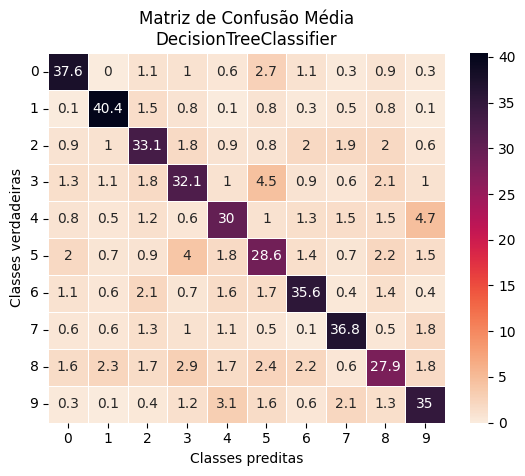

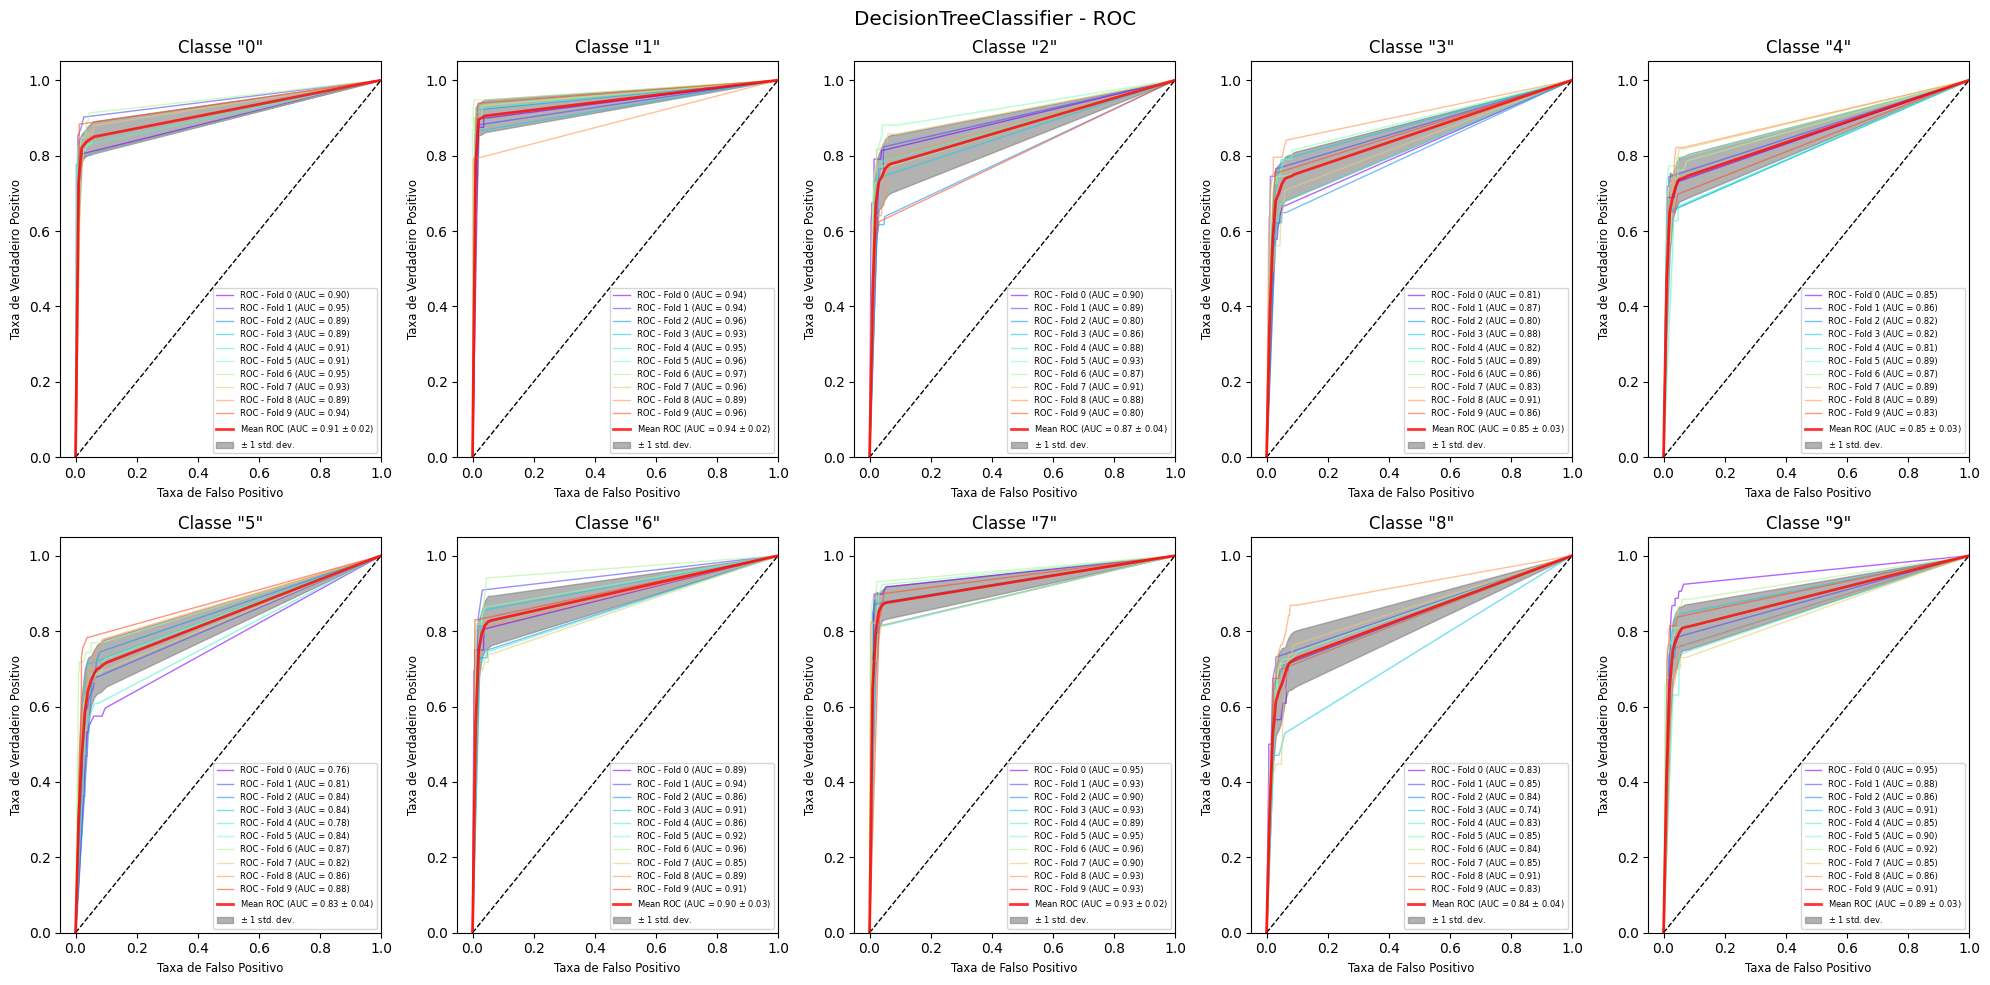

In [23]:
dt_results = Results('DecisionTreeClassifier', dt_acc, dt_f1, dt_cm, dt_roc, '')
dt_results.plot()

### GaussianNB

Resumo das métricas do modelo GaussianNB

Accurácia média (desvio): 0.876 (0.011)
F1-Score média (desvio): 0.876 (0.012)


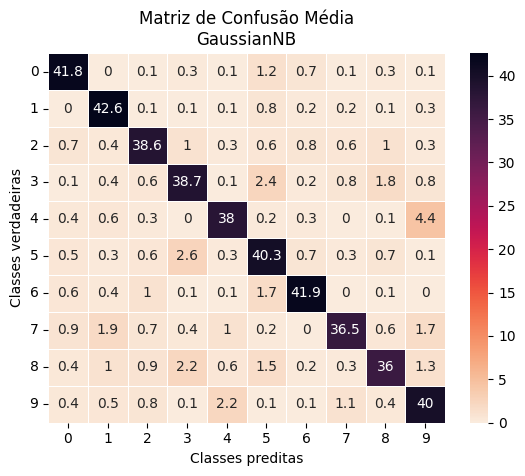

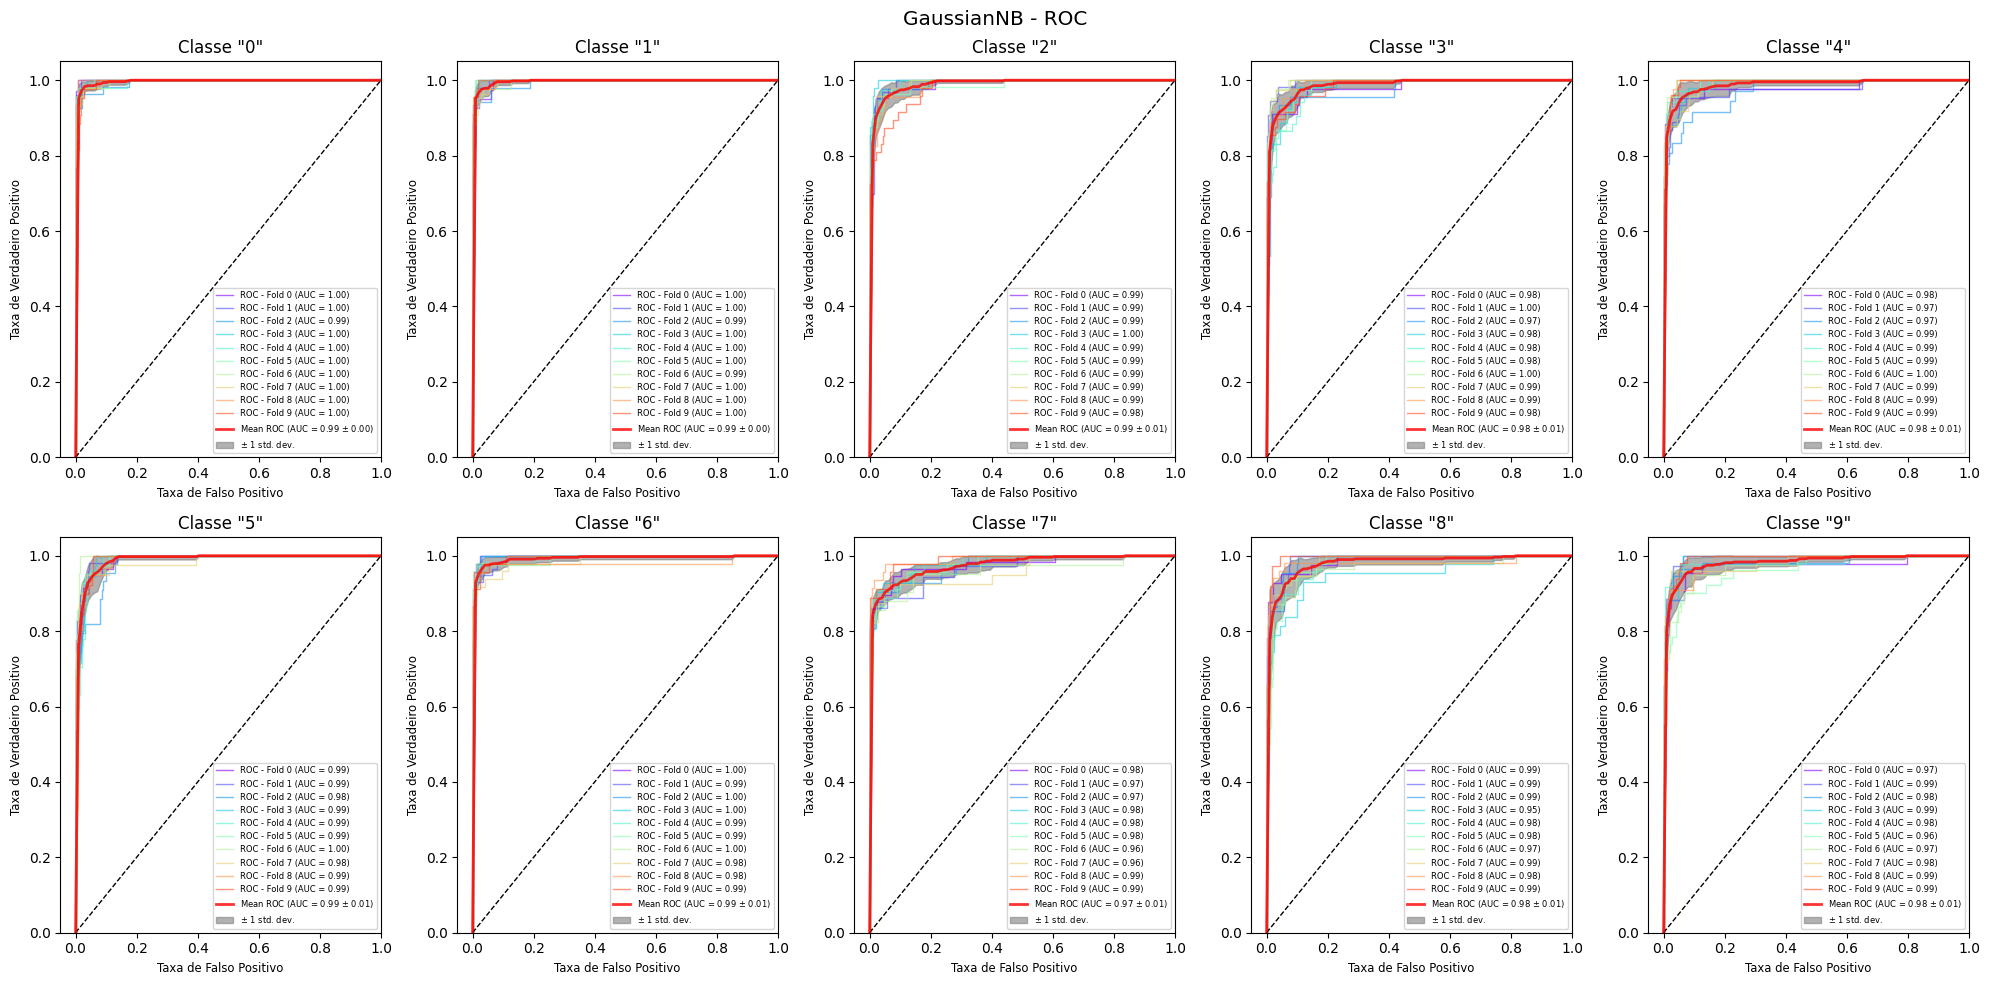

In [24]:
gnb_results = Results('GaussianNB', gnb_acc, gnb_f1, gnb_cm, gnb_roc, '')
gnb_results.plot()

### MultinomialNB

Resumo das métricas do modelo MultinomialNB

Accurácia média (desvio): 0.835 (0.018)
F1-Score média (desvio): 0.834 (0.019)


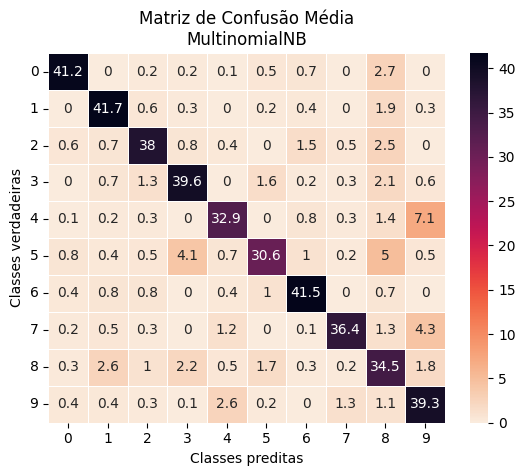

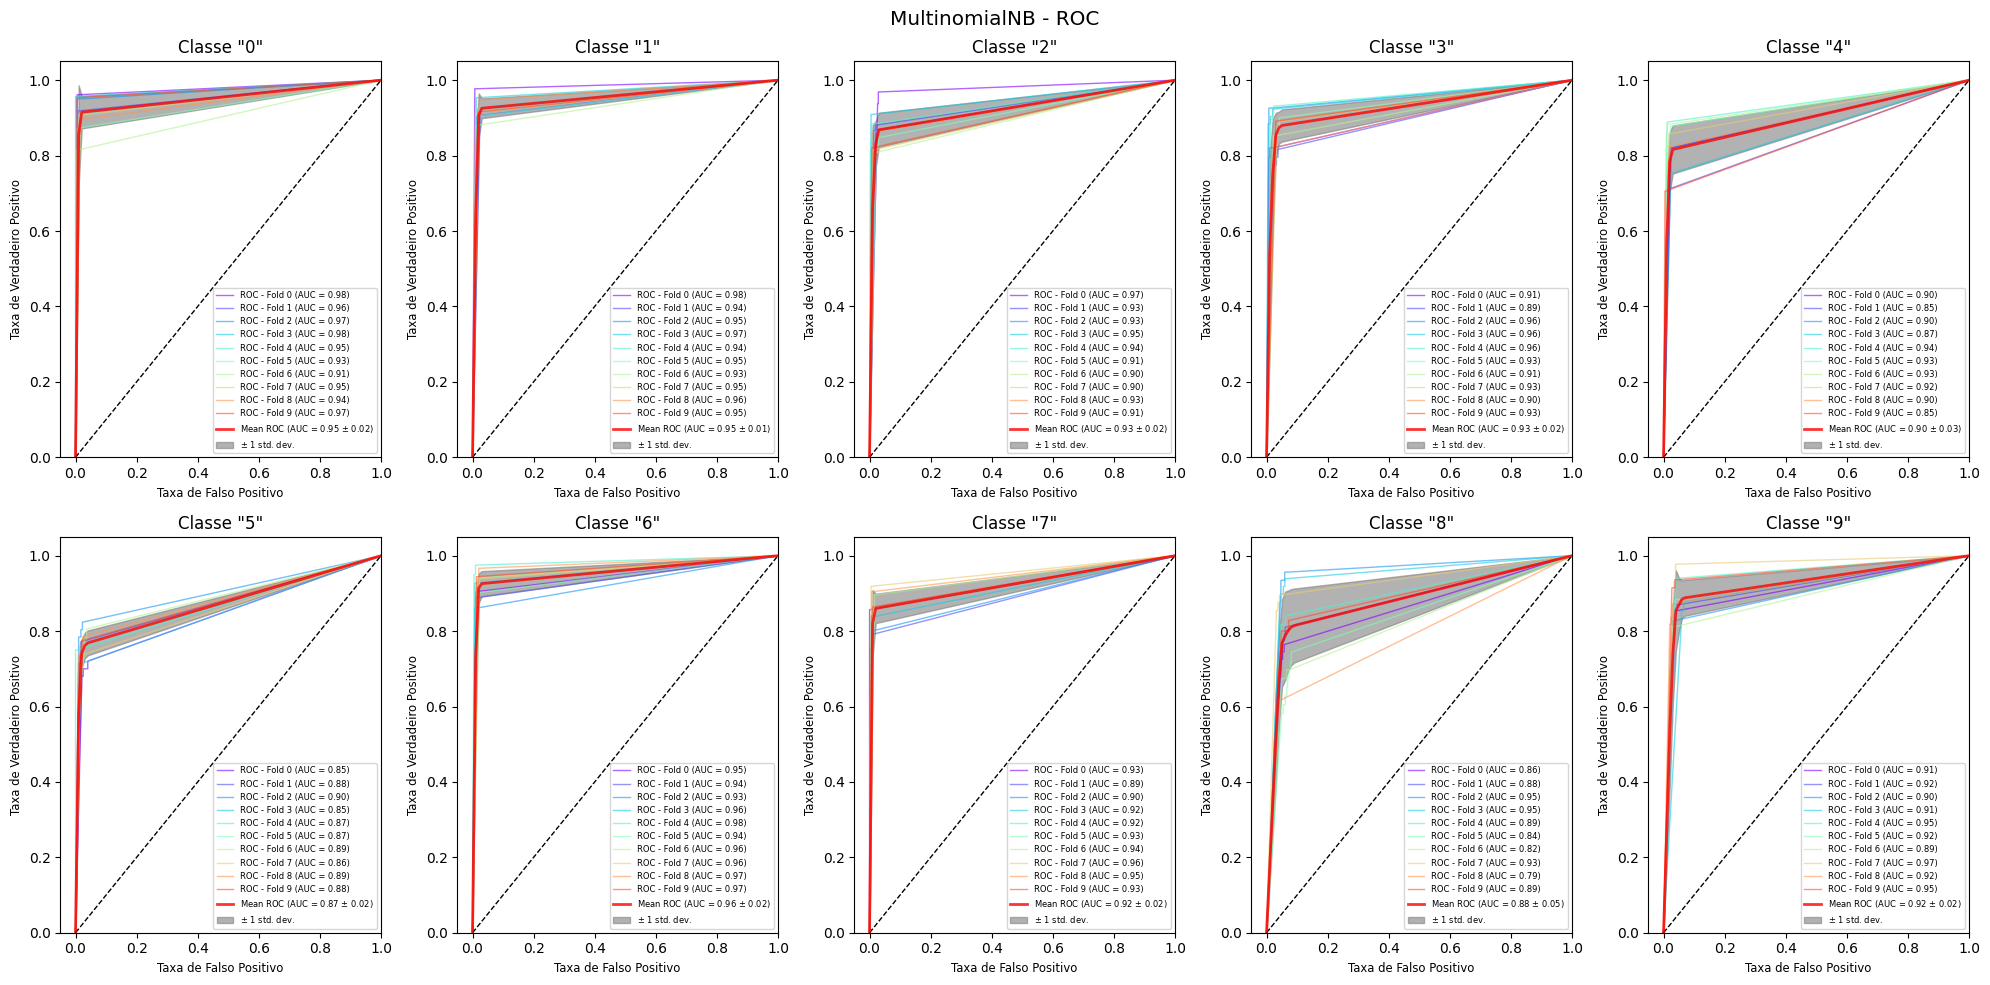

In [25]:
mnb_results = Results('MultinomialNB', mnb_acc, mnb_f1, mnb_cm, mnb_roc, '')
mnb_results.plot()

### MLP

Resumo das métricas do modelo MLP

Accurácia média (desvio): 0.926 (0.015)
F1-Score média (desvio): 0.926 (0.015)


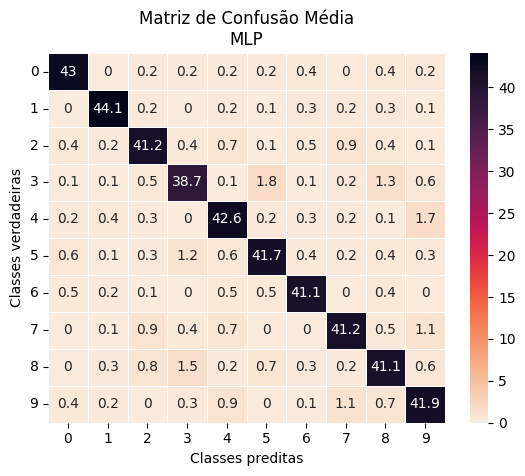

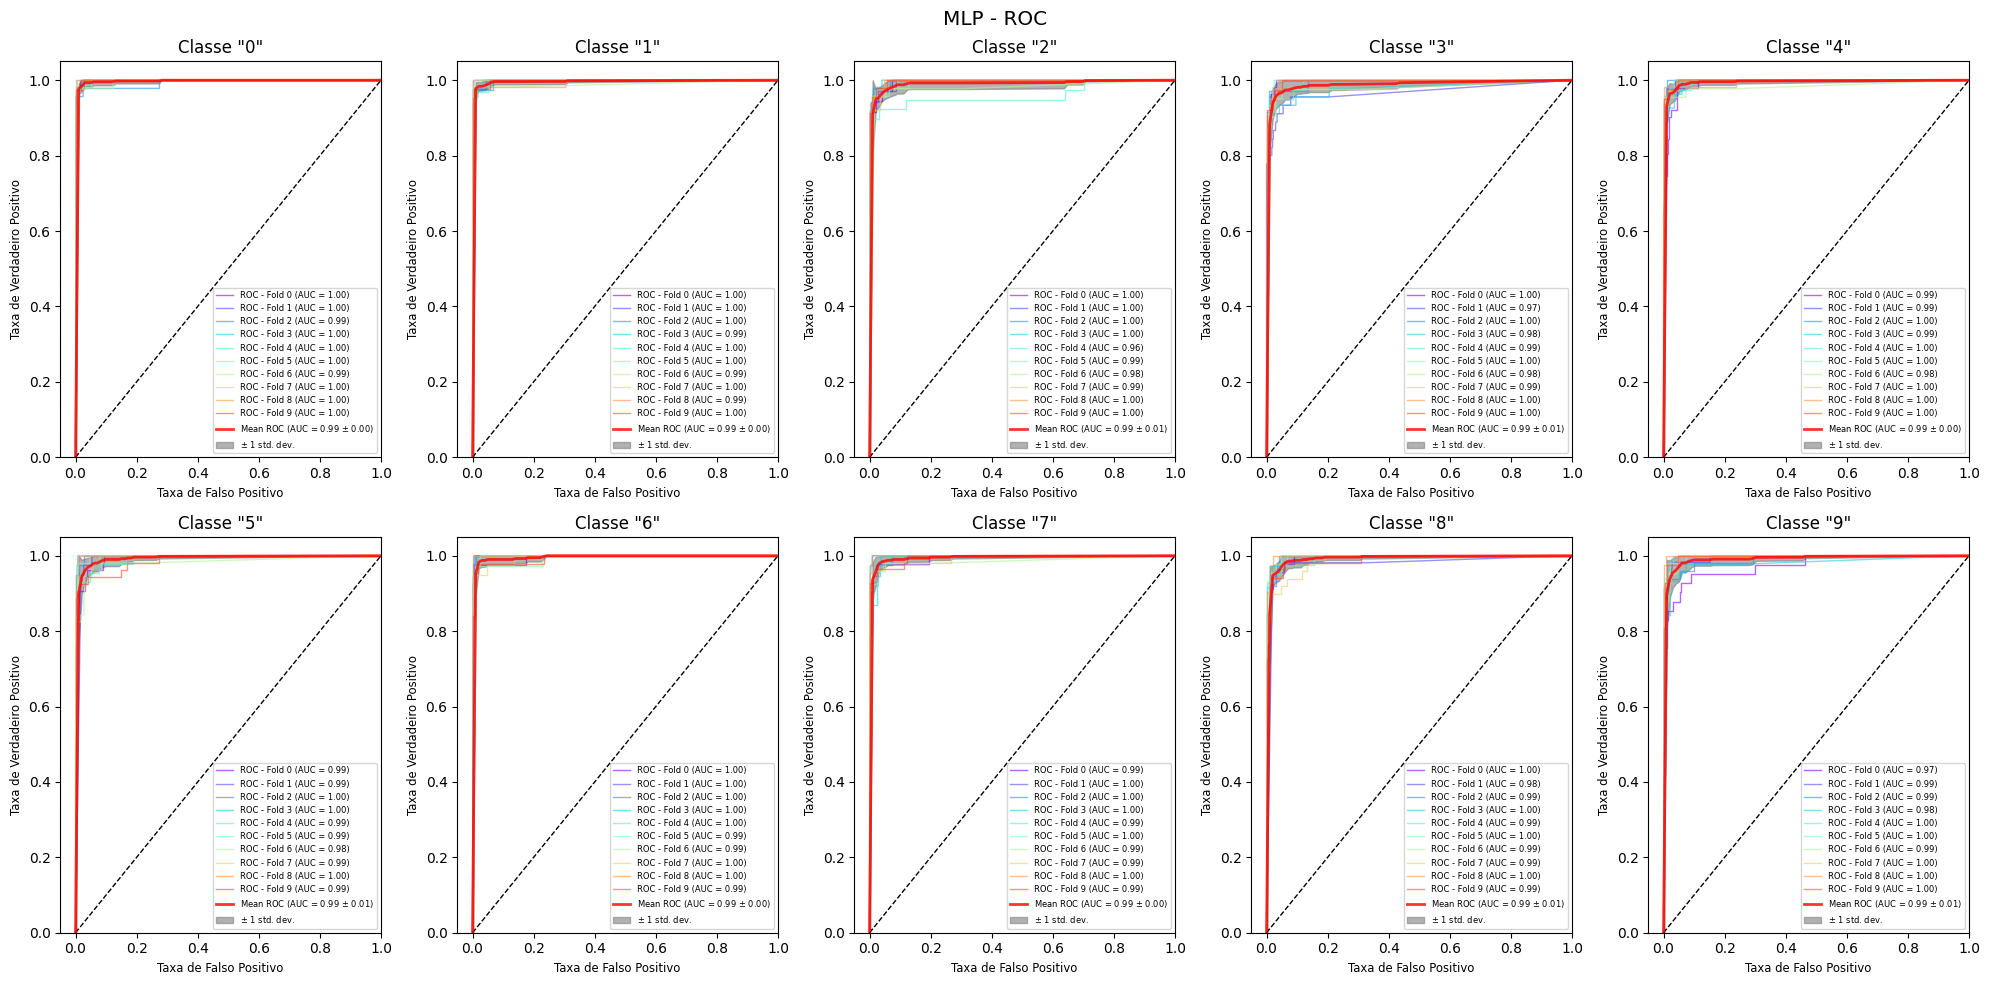

In [26]:
mlp_results = Results('MLP', mlp_acc, mlp_f1, mlp_cm, mlp_roc, '')
mlp_results.plot()

### KNN 

Resumo das métricas do modelo KNN

Accurácia média (desvio): 0.939 (0.019)
F1-Score média (desvio): 0.938 (0.019)


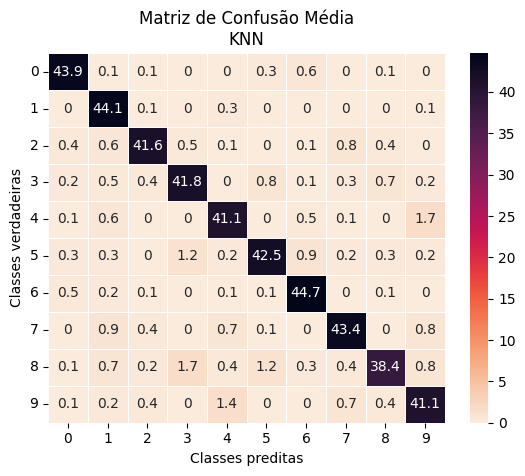

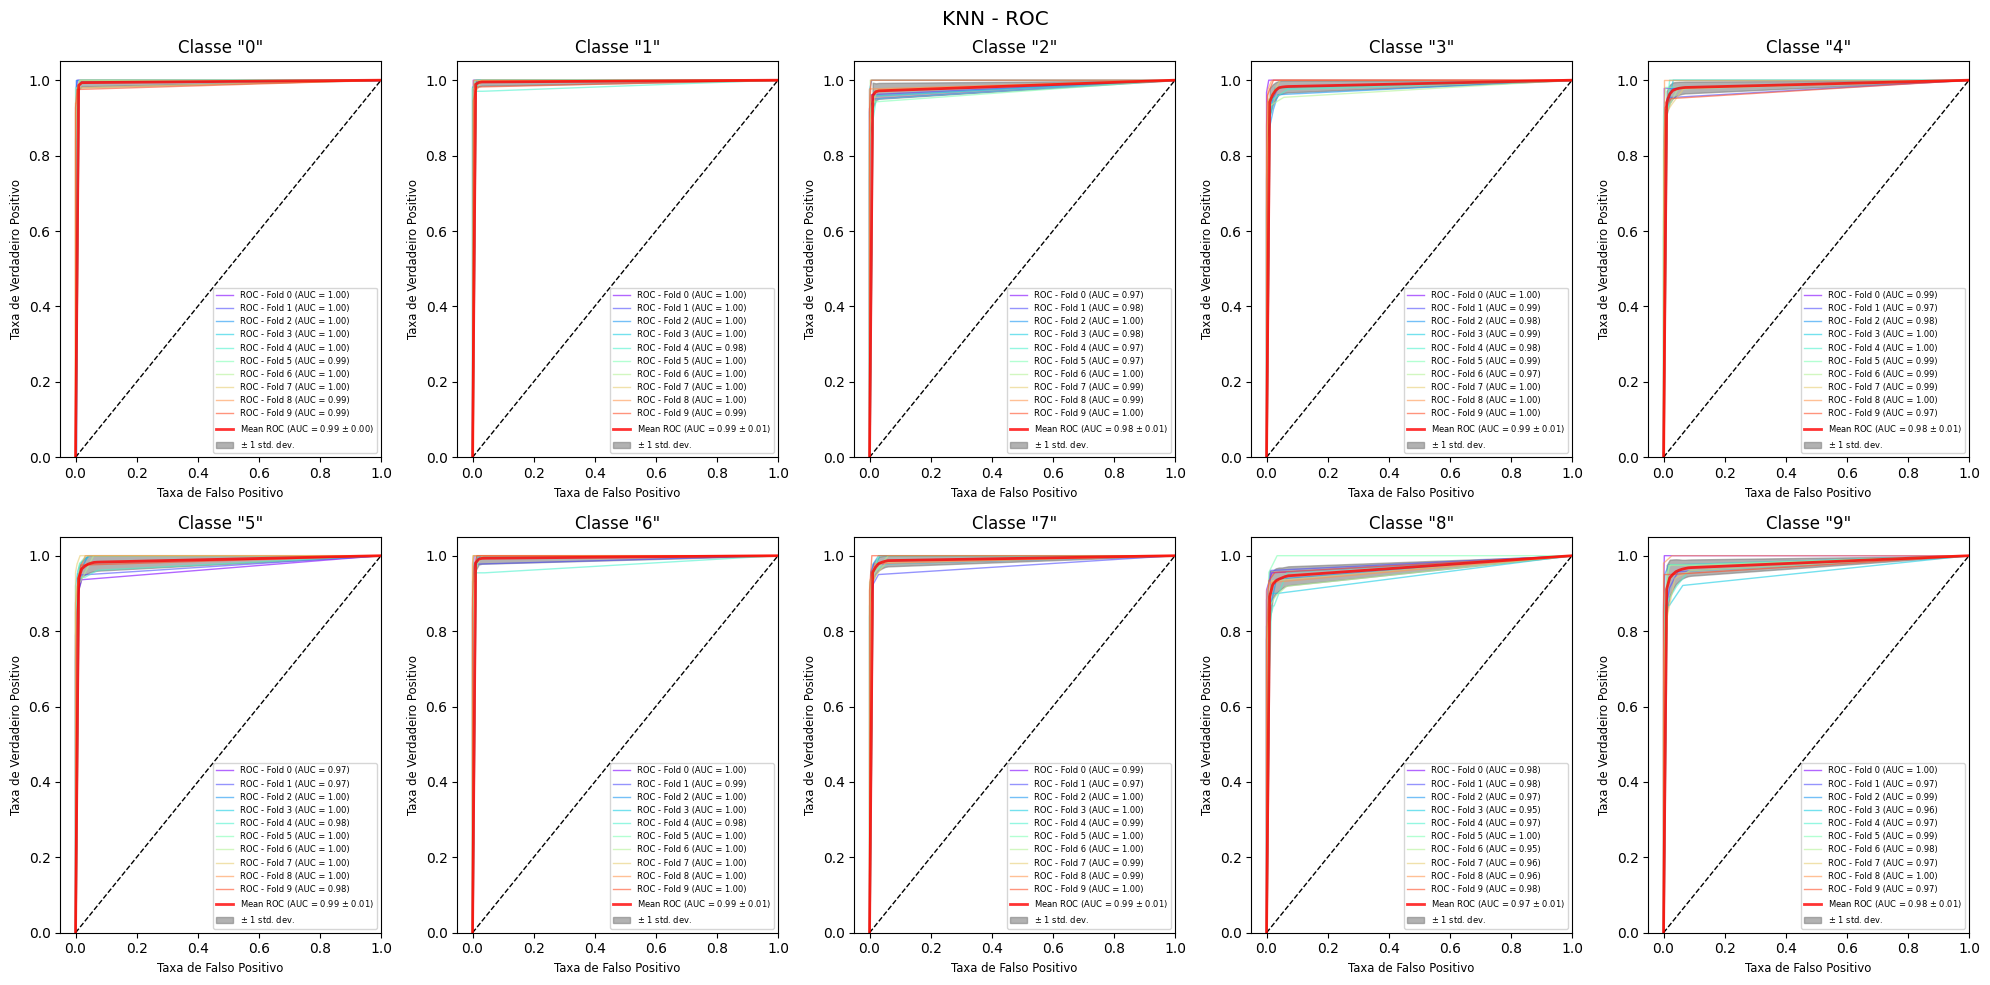

In [27]:
knn_results = Results('KNN', knn_acc, knn_f1, knn_cm, knn_roc, '')
knn_results.plot()

### SVC

Resumo das métricas do modelo SVC

Accurácia média (desvio): 0.946 (0.007)
F1-Score média (desvio): 0.946 (0.007)


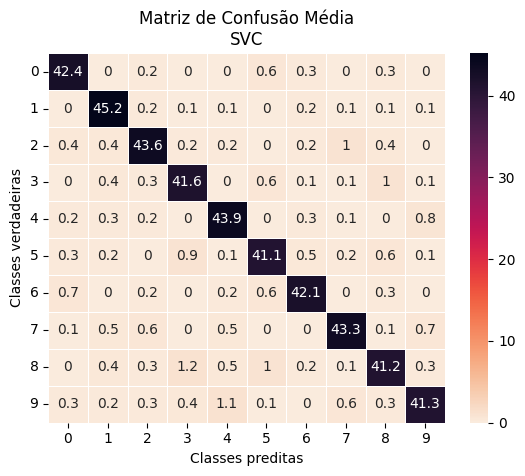

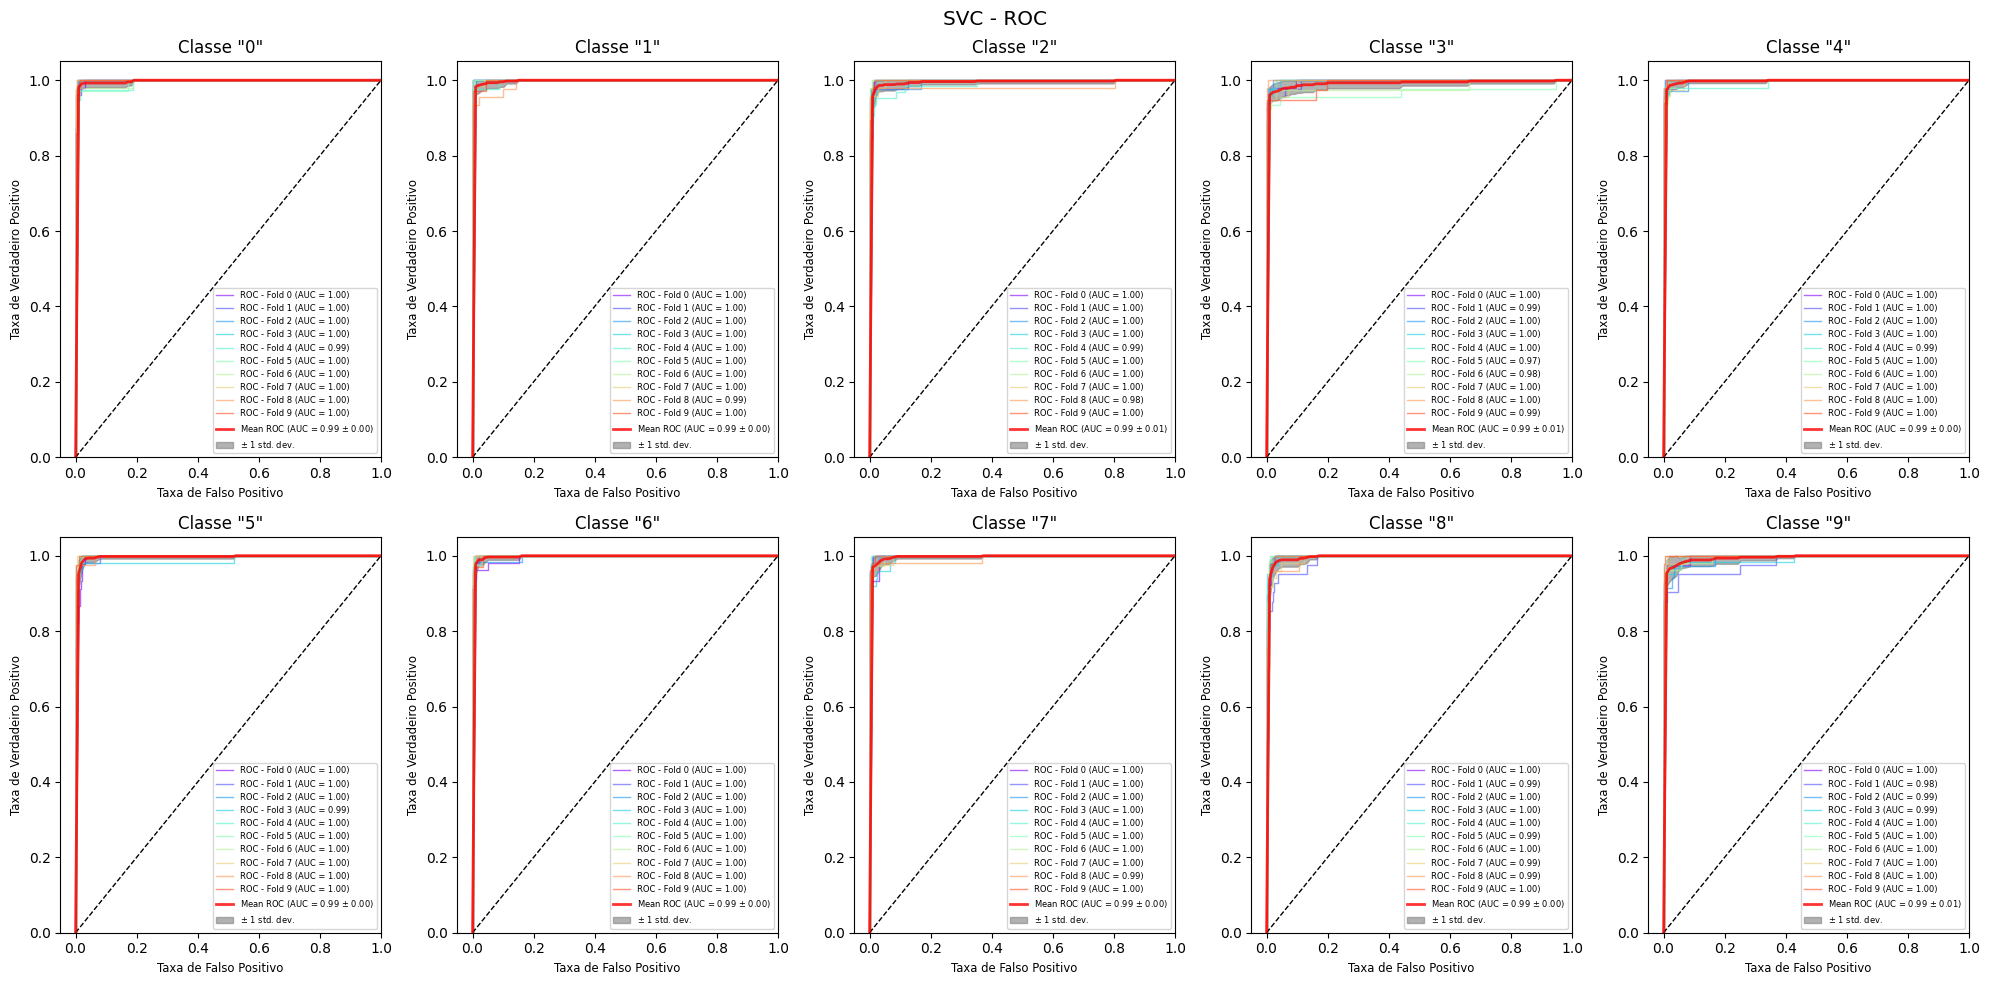

In [28]:
svc_results = Results('SVC', svc_acc, svc_f1, svc_cm, svc_roc, '')
svc_results.plot()

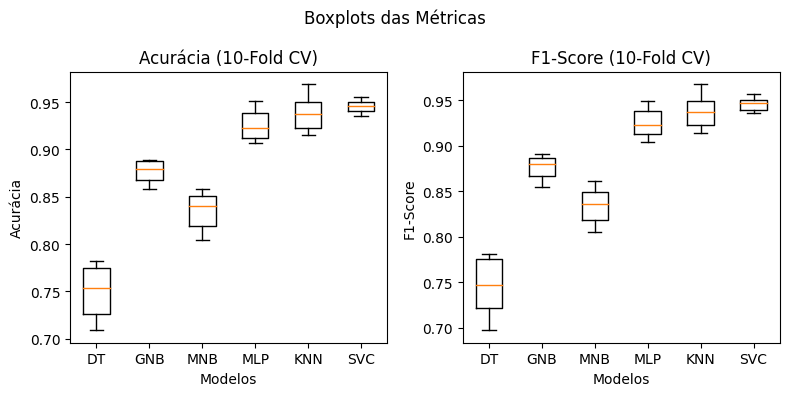

In [29]:
dfs = [acc_df, fscore_df]
metrics = ['Acurácia', 'F1-Score']

plot_box(dfs, metrics)

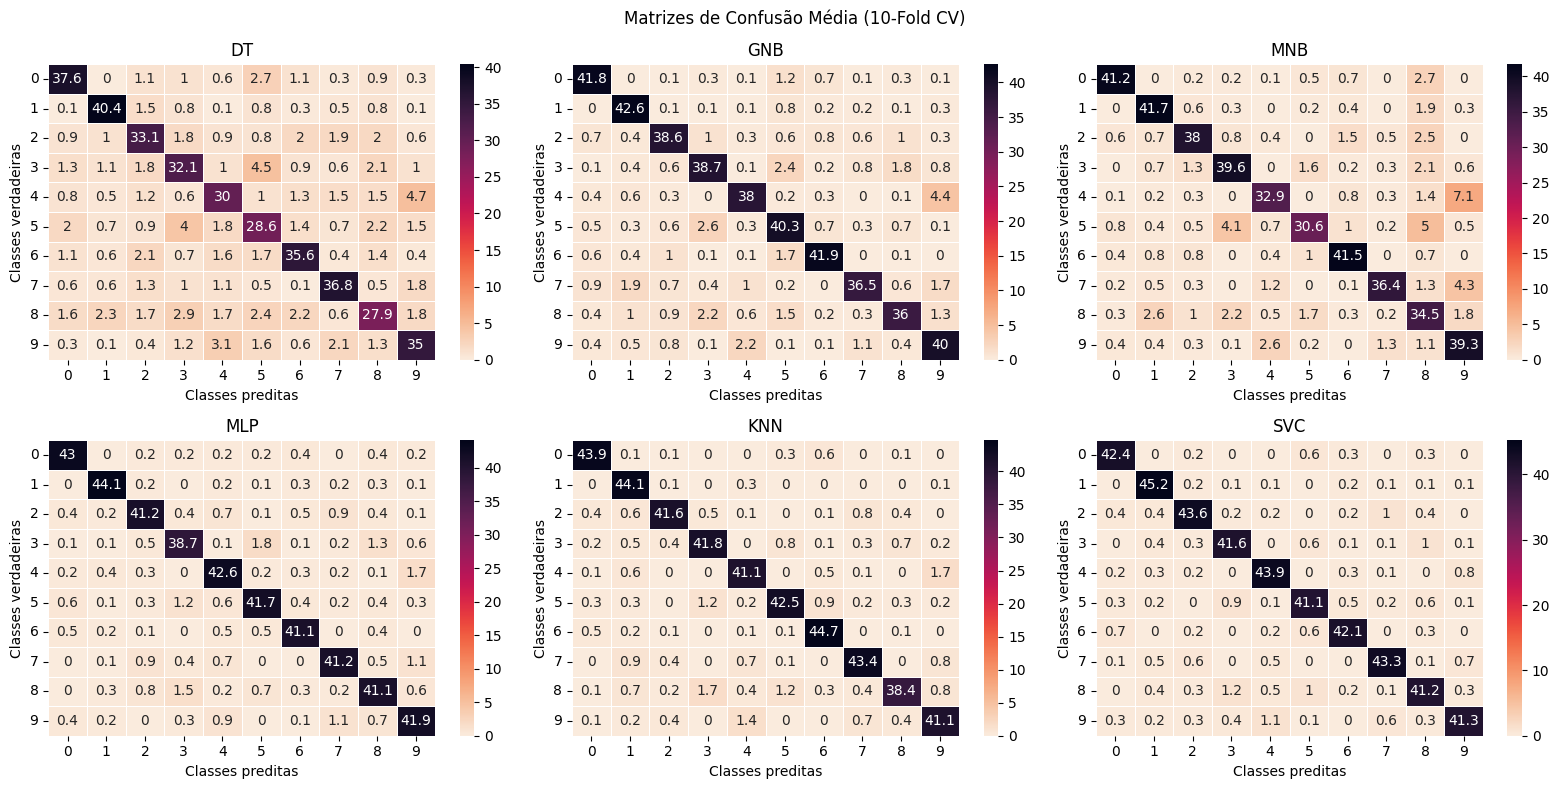

In [30]:
cm_list = [dt_cm, gnb_cm, mnb_cm, mlp_cm, knn_cm, svc_cm]
models_name = ['DT', 'GNB', 'MNB', 'MLP', 'KNN', 'SVC']
plot_cms(cm_list, models_name)

## Testes de Hipóteses


A seguir faremos testes de normalidade para a distribuição das Acurácias

### Hipóteses:

H0: Os dados seguem uma distribuição Normal

H1: C.C

In [31]:
from scipy import stats

def normality(test, *args):
    for arg in args:
        print(test(arg))
    
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)


Shapiro-Wilk

ShapiroResult(statistic=0.8941260576248169, pvalue=0.18863262236118317)
ShapiroResult(statistic=0.8906320929527283, pvalue=0.1723771095275879)
ShapiroResult(statistic=0.9138128757476807, pvalue=0.3082214891910553)
ShapiroResult(statistic=0.9235344529151917, pvalue=0.38737937808036804)
ShapiroResult(statistic=0.9025282263755798, pvalue=0.2335016280412674)
ShapiroResult(statistic=0.9248536825180054, pvalue=0.3992188572883606)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=2.7093627582522806, pvalue=0.2580294949388936)
NormaltestResult(statistic=1.8435230268455731, pvalue=0.3978176623697788)
NormaltestResult(statistic=1.6587228584458402, pvalue=0.43632782357655786)
NormaltestResult(statistic=2.058509086229049, pvalue=0.357273193086169)
NormaltestResult(statistic=1.8569008686745692, pvalue=0.39516557119011647)
NormaltestResult(statistic=1.3090785463567558, pvalue=0.5196814386168052)


/home/balieiro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)


Shapiro-Wilk

ShapiroResult(statistic=0.911694347858429, pvalue=0.2928333878517151)
ShapiroResult(statistic=0.911428689956665, pvalue=0.2909500002861023)
ShapiroResult(statistic=0.9449793100357056, pvalue=0.6096237897872925)
ShapiroResult(statistic=0.9403632879257202, pvalue=0.5570632815361023)
ShapiroResult(statistic=0.9121253490447998, pvalue=0.29591161012649536)
ShapiroResult(statistic=0.9496485590934753, pvalue=0.6643442511558533)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=1.8420272876405446, pvalue=0.39811528938603535)
NormaltestResult(statistic=1.7877411618280064, pvalue=0.4090693485669431)
NormaltestResult(statistic=1.3383898662948628, pvalue=0.5121207032727182)
NormaltestResult(statistic=1.7377932202450548, pvalue=0.4194140712703638)
NormaltestResult(statistic=1.7764896158134844, pvalue=0.41137716540631597)
NormaltestResult(statistic=1.424613462961558, pvalue=0.49051141333004356)


Pelos resultados, não conseguimos rejeitar a hipótese nula para nenhum dos conjuntos de acurácia

T-test para comparar as acurácias médias entre os três modelos mais bem sucedidos

In [33]:
def ttest_multiple_samples(data:dict[str, list]) -> dict:
    from itertools import combinations

    combined_data = dict()
    for combined_key in combinations(data.keys(), 2):
        test_result = stats.ttest_rel(data[combined_key[0]], data[combined_key[1]], alternative='less')
        combined_data[f'{combined_key[0]}_{combined_key[1]}'] = test_result
        
    return combined_data

acc_data = {
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre a Acurácia dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)


Comparação entre a Acurácia dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-1.8786728732554536, pvalue=0.04650153544007209) 

Comparação entre a Acurácia dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.5696187681755522, pvalue=0.0030139186107372698) 

Comparação entre a Acurácia dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-1.10612436227753, pvalue=0.1486807687935259) 



In [34]:
acc_data = {
    'MLP': mlp_f1,
    'KNN': knn_f1,
    'SVC': svc_f1,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre F1-Scores dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)



Comparação entre F1-Scores dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-1.7738769503310383, pvalue=0.054916340580012254) 

Comparação entre F1-Scores dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.4771532948856914, pvalue=0.003484873121423601) 

Comparação entre F1-Scores dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-1.1781244821234256, pvalue=0.1344790768162836) 

